In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('fivethirtyeight')
%matplotlib inline

# Color convention for the course:
# Blue (solid): Data and true distributions
# Red (dashed): Approximations (CLT, delta method, etc.)
COLOR_DATA = 'steelblue'
COLOR_APPROX = 'firebrick'

In [45]:
def binom_cdf_plot(n, p):
    # Binomial (n, p) cdf
    # n, p = 5, 0.5
    vals = np.arange(n + 1) # possible values
    cdf = stats.binom.cdf(vals, n, p) # cdf values

    # Plotting the cdf
    cdf_n = np.insert(cdf, 0, 0)
    x_vals = np.arange(-1, n+2)

    plt.figure(figsize = (6, 4))
    plt.plot([-1.5, n+1.5], [0,0], color='gray', lw=1, zorder=1) # x-axis

    # horizontal lines
    plt.hlines(y=cdf_n, xmin=x_vals[:-1], xmax=x_vals[1:], color=COLOR_DATA, lw=2)
    plt.plot([n+1, n+1.5], [1, 1], color=COLOR_DATA, lw=2)
    plt.plot([-1.5, -1], [0, 0], color=COLOR_DATA, lw=2)

    # vertical dashed lines
    plt.vlines(x=x_vals[1:-1], ymin=cdf_n[:-1], ymax=cdf_n[1:], color=COLOR_DATA, lw=2, linestyle='dashed')

    # values at the jumps
    plt.scatter(x_vals[1:-1], cdf, color=COLOR_DATA, s=24)
    plt.scatter(x_vals[1:-1], cdf_n[:-1], color='white', s=24, edgecolor=COLOR_DATA, zorder=2)

    plt.xticks(x_vals)
    plt.title('Binomial (' + str(n) + ', ' + str(p) + ') CDF', size=12);

In [46]:
def expon_cdf_plot(lam):
    # Exponential (rate lambda) cdf
    #lam = 0.2
    xmax = 4/lam
    x = np.arange(0, xmax, 0.05)
    cdf = 1 - np.e**(-lam * x)

    plt.figure(figsize = (6, 4))
    plt.plot([-2, xmax], [0, 0], color='gray', lw=1)
    plt.plot(x, cdf, color=COLOR_DATA, lw=2)
    plt.plot([-2, 0], [0, 0], color=COLOR_DATA, lw=2)
    plt.title('Exponential (' + str(lam) + ') CDF', size=12);

In [47]:
def killed_expon_cdf_plot(lam):
    # Cdf of exponential (rate lambda) killed at d = 1 SD above the mean
    # lam = 0.2
    d = 2/lam
    xmax = 4/lam
    x = np.arange(0, d, 0.05)
    cdf_cts = 1 - np.e**(-lam * x)

    plt.figure(figsize = (6, 4))
    plt.plot([-2, xmax], [0, 0], color='gray', lw=1) # x-axis
    plt.plot(x, cdf_cts, color=COLOR_DATA, lw=2) 
    plt.plot([d, xmax], [1, 1], color=COLOR_DATA, lw=2)
    plt.scatter(d, 1, color=COLOR_DATA, s=24)
    plt.scatter(d, 1-np.e**(-lam*d), color='white', s=24, edgecolor=COLOR_DATA, zorder=2)
    plt.plot([-2, 0], [0, 0], color=COLOR_DATA, lw=2)
    plt.title('CDF of Exponential (' + str(lam) + ') Killed at ' + str(d), size=12);

In [48]:
def standardized_binom_convergence(n, p):
    # Standarized binomial converging to standard normal

    # The binomial; its mean and SD
    # n = 100
    # p = 0.5
    mu = n*p
    sigma = (n*p*(1-p))**0.5

    # Plot standard normal cdf (red)
    plt.xlim = (-4, 4)
    z = np.arange(-4, 4.01, 0.01)
    plt.plot(z, stats.norm.cdf(z), color=COLOR_APPROX, lw=1)

    # Cdf of standardized Binomial (n, p)
    lo = np.floor(mu - 4*sigma)
    hi = np.ceil(mu + 4*sigma)
    vals = np.arange(lo, hi+1, 1) # possible values
    cdf = stats.binom.cdf(vals, n, p) # cdf values

    # Plotting the cdf (horizontal blue lines) on the standardized scale
    cdf_n = np.insert(cdf, 0, cdf[0])
    x_vals = (np.arange(lo-1, hi+2) - mu)/sigma

    # horizontal lines
    plt.hlines(y=cdf_n, xmin=x_vals[:-1], xmax=x_vals[1:], color=COLOR_DATA, lw=2)

    plt.xlabel('Standard units', size=10)
    plt.title('Standard normal CDF, and CDF of Standardized Binomial (' + str(n) + ', ' + str(p) +')', size=12);

In [109]:
def discontinuous_limit(n):
    plt.figure(figsize=(4,3))
    plt.plot([-1.5, 1/n], [0, 0], color=COLOR_DATA, lw=2)
    plt.plot([1/n, 1], [1 - 1/n, 1 - 1/n], color=COLOR_DATA, lw=2)
    plt.plot([1, 1.5], [1, 1], color=COLOR_DATA, lw=2)
    plt.scatter([1/n, 1], [1-1/n, 1], color=COLOR_DATA, s=24)
    plt.scatter([1/n, 1], [0, 1-1/n], color='white', s=24, edgecolor=COLOR_DATA, zorder=2)
    plt.plot([-1.5, 0], [0, 0], color=COLOR_APPROX, lw=1, linestyle='dashed')
    plt.plot([0, 1.5], [1, 1], color=COLOR_APPROX,lw=1, linestyle='dashed') 
    plt.scatter(0, 1, color=COLOR_APPROX, s=24)
    plt.scatter(0, 0, color='white', s=24, edgecolor=COLOR_APPROX, zorder=2)
    plt.xlabel('x')
    plt.title('$F_n$ (blue) and $F$ (red)', size=12);

# Lecture 2: Convergence of Random Sequences, and the Delta Method

**Data 145, Spring 2026: Evidence and Uncertainty**  

**Instructors:** Ani Adhikari, William Fithian

---

**Please run all the code cells above before you start reading.** 

---

In this lecture we'll examine different ways in which random variables converge. Then we'll apply our observations to show why the delta method works.

We will state several facts without proof, partly because the course doesn't assume a background in limits of sequences but also because our time will be better spent on examples.

We are going to have to be clear about exactly what we mean by "convergence". As you saw in your probability class, random variables have two kinds of equality: equality as functions and equality in distribution. So also sequences of random variables can converge in various senses, two of which we will examine in this lecture. You'll examine a third sense in this week's worksheet.

A few preliminaries will help us understand the approach taken in defining some concepts.

### Preliminary 1: The CDF

As you know, every distribution has a cumulative distribution function (cdf). For a random variable $X$ the cdf of $X$ is a function from the real line to the unit interval, defined by

$$
F(x) ~ = ~ P(X \le x), ~~~~~ x \in \mathbb{R}
$$

The cdf of a discrete distribution is a step function, with the jumps at the possible values.

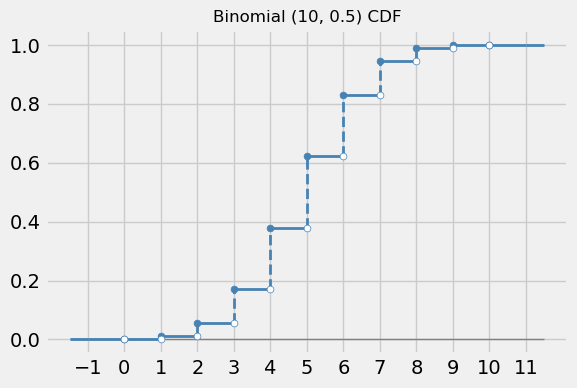

In [49]:
binom_cdf_plot(10, 0.5) # Binomial cdf; arguments are n, p

Here's the cdf of a distribution that has a density.

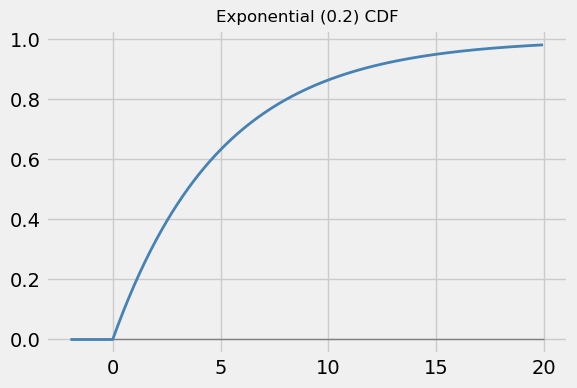

In [50]:
expon_cdf_plot(0.2) # Exponential cdf; argument is the rate

Distributions don't sort neatly into two piles: "discrete" and "has a density." Here's a mixture of the two kinds.

Let $T$ be an exponential $(\lambda)$ variable. For a fixed positive $d$, define $X = \min(T, d)$ to be "$T$ killed at $d$". That is,

$$
X ~ = ~
\begin{cases}
T & \text{if } T < d \\
d & \text{if } T \ge d
\end{cases}
$$

If you think of $T$ as the waiting time till the next earthquake, you've decided to watch till there's an earthquake or you've been watching for $d$ units of time, whichever happens sooner. $X$ is the amount of time you watch, and, by definition, $P(X \le d) = 1$. 

$X$ doesn't have a density, because
$$
P(X = d) ~ = ~ P(T \ge d) ~ = ~ P(T > d) ~ = ~ e^{-\lambda d} ~ > ~ 0
$$

But for $x < d$, $P(X \le x) = P(T \le x) = 1 - e^{-\lambda x}$, which is the form of the exponential cdf.

So the cdf of $X$ is part continuous but it also has a jump.

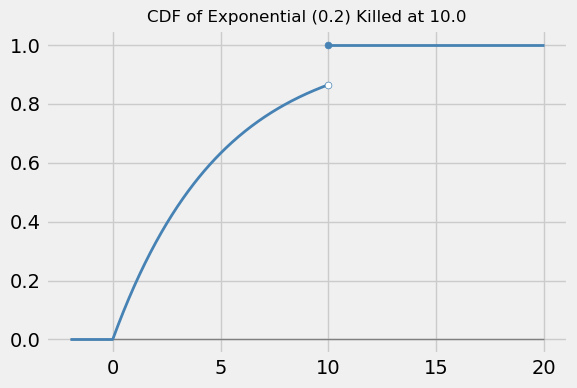

In [51]:
killed_expon_cdf_plot(0.2) # # Cdf of exponential (argument = rate) killed at d = 1 SD above the mean

The main point for us is that no matter whether a distribution is discrete, continuous, or neither, it has a cdf. That makes the cdf a convenient way to describe an arbitrary distribution.

### Preliminary 2: Mass Drifting Off to Infinity

In the setting of the Central Limit Theorem that you have seen in previous classes, $X_1, X_2, \ldots, X_n$ are i.i.d. with mean $\mu$ and variance $\sigma^2$, and the sample sum is $S_n = \sum_{i=1}^n X_i$.

Loosely, we say that the distribution of $S_n$ approaches the normal as $n$ gets large. But now we're going to be a little more careful.

You know that $E(S_n) = n\mu$ and $SD(S_n) = \sqrt{n}\sigma$. Both of these get larger as $n$ increases. So the distribution of $S_n$ drifts to the right and flattens out.

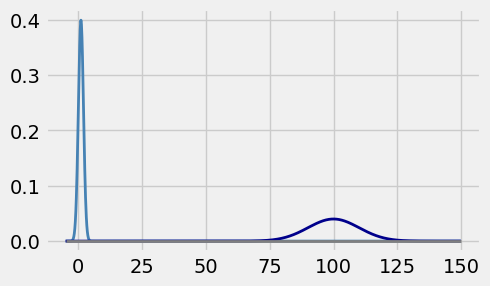

In [52]:
plt.figure(figsize=(5, 3))
x = np.arange(-5, 150, 0.1)
plt.plot(x, stats.norm.pdf(x, 1, 1), color=COLOR_DATA, lw=2, zorder=1)
plt.plot(x, stats.norm.pdf(x, 100, 10), color='darkblue', lw=2, zorder=2)
plt.plot([-5, 150], [0, 0], color='gray', lw=2, zorder=3);

As $n$ tends to infinity, you can imagine all the probability drifting off to infinity. So what does it mean for the sum to "tend to normal" as $n$ gets large?

### Preliminary 3: Scaling
Finding the right scale can help control this kind of drift. It can also help us come up with more interesting limit statements than, "The distributions converge to point mass at 0." 

In the case of the CLT, the natural scale is standard units: *The distribution of the standardized sum converges to the standard normal.*

That is, the distribution of $\displaystyle \frac{S_n - n\mu}{\sqrt{n}\sigma}$ converges to standard normal.

For a fixed large $n$, the CLT implies that $S_n$ is approximately normal with mean $n\mu$ and variance $n\sigma^2$.

The scale matters. What do you think would happen if we had put $n$ in the denominator instead of $\sqrt{n}$? If you guessed that the distribution would go to point mass at $0$, you're right. Later in the lecture we'll see why.

Typically, we'll write the CLT in terms of the sample mean $\bar{X}_n = S_n/n$. The standardized sample mean is

$$
\frac{\bar{X}_n - \mu}{\sigma /\sqrt{n}} ~ = ~ \sqrt{n}(\bar{X}_n - \mu)/\sigma
$$

Get used to this form for the standardized sample mean. "Root $n$ scaling" is often written this way.

---

## Convergence in Distribution to Standard Normal

Let $X_1, X_2, \ldots$ be a sequence of random variables. For each $i \ge 1$ let $F_n$ be the cdf of $X_n$. As usual, let $\Phi$ be the cdf of the standard normal distribution.

**Definition:** The sequence $X_n$ ***converges in distribution to the standard normal*** if for all $x \in \mathbb{R}$, $F_n(x) \to \Phi(x)$ as $n \to \infty$.

**Notation:** We can write this as $X_n \stackrel{d}{\rightarrow} Z$ where the distribution of $Z$ is standard normal. Or we can write $X_n \stackrel{d}{\rightarrow} N(0, 1)$. Of course it's fine to write $F_n \to \Phi$.

The figure below shows the cdf of the standardized binomial $(n, p)$ variable (in blue) and the standard normal cdf $\Phi$ (in red). You can increase $n$ to see that the graph of blue horizontal lines looks more like the red curve.

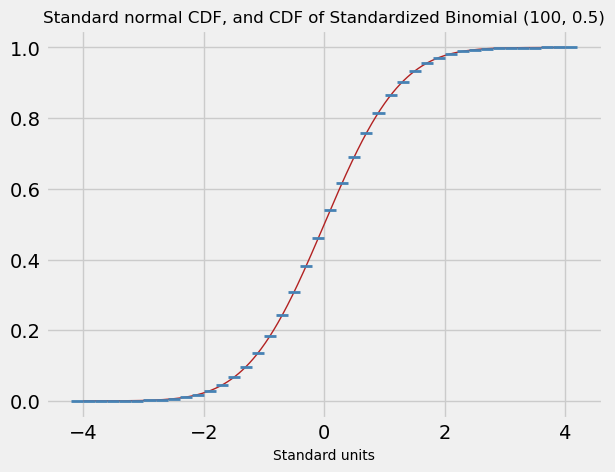

In [59]:
standardized_binom_convergence(100, 0.5) # Standarized binomial (arguments = n, p) and standard normal cdfs

**Convergence in distribution is a property of the cdf sequence alone.** The spaces on which the random variables are defined as functions aren't involved. 

The next example points out that convergence in distribution is a property of distributions and not of the random variables as functions.

**Cautionary example:** Let $Z$ be standard normal. Take $X_n = Z$ for all $n$, and let $X$ be $-Z$. Then for each $n$ we have $F_n = \Phi$, the standard normal cdf. Now the distribution of $X = -Z$ is also standard normal, so the cdf of $X$ is $F = \Phi$ as well. Therefore $X_n \stackrel{d}{\rightarrow} X$. That is, the sequence $Z, Z, Z, \dots$ converges in distribution to $-Z$.

## Convergence in Distribution: General Definition

The definition of convergence in distribution of the standard normal, given above, can be generalized to convergence in distribution to any other distribution that has a continuous cdf. 

But if the limit distribution has jumps, then we have to be careful. Let's look at an example to see why.

For $n \ge 1$, consider the random variable $X_n$ with distribution given by

$$
X_n = 
\begin{cases} 
  \frac{1}{n} & \text{with probability } 1-\frac{1}{n}\\
  1 & \text{with probability } \frac{1}{n}\\
\end{cases}
$$

For large $n$, $X_n$ is close to $0$ with high probability. So it's reasonable to think of the constant $0$ as the limit. To be consistent with our notation above, the limit is a random variable $X$ for which $P(X=0) = 1$. 

Now look at the cdf sequence. The graph below shows $F$ and an $F_n$.

$$
F_n(x) = 
\begin{cases}
0 & \text{for } x < \frac{1}{n} \\
1 - \frac{1}{n} & \text{for } \frac{1}{n} \leq x < 1 \\
1 & \text{for } x \geq 1
\end{cases}
$$

$$
F(x) = 
\begin{cases}
0 & \text{for } x < 0 \\
1 & \text{for } x \geq 0
\end{cases}
$$

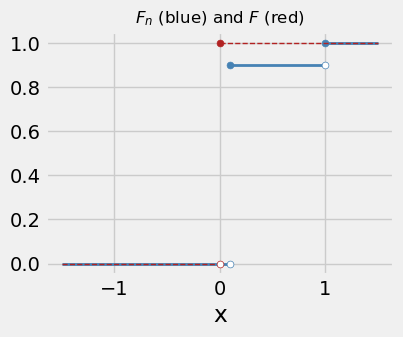

In [110]:
discontinuous_limit(10) # argument: n

Compare the graphs of $F_n$ and $F$. 
- For each $x < 0$, we have $F_n(x) \to 0 = F(x)$.
- For each $x > 0$, we have $F_n(x) \to 1 = F(x)$. 

The problem is at $x = 0$, which is the only point at which the limit cdf $F$ is discontinuous.  

But it is still natural to want to say that $X_n$ converges in distribution to $0$. So the definition omits the discontinuity point of the limit, as requiring convergence there is asking too much. 

Consider random variables $X_1, X_2, ...$ not necessarily defined on the same outcome space. Let the cdf of $X_n$ be $F_n$. Let $X$ be another random variable with cdf $F$.

**Definition:** $X_n$ ***converges in distribution*** to $X$ if $F_n(x) \rightarrow F(x)$ at all continuity points $x$ of the limit cdf $F$.

**Notation:** We will typically write $X_n \stackrel{d}{\rightarrow} X$.

---

### Convergence in Probablility

For a stronger sense in which random variables converge, let $X_1, X_2, \ldots$ and $X$ be random variables defined on the same space.

$X_n$ ***converges in probability*** to $X$, denoted $X_n \xrightarrow{P} X$, if for every $\epsilon > 0$ we have $P(\vert X_n - X \vert > \epsilon) \rightarrow 0$ as $n \to \infty$.

In other words, the chance that $X_n$ and $X$ differ by more than any fixed amount is small for large enough $n$.

---

**Example: Weak Law of Large Numbers**

This is the sense in which the average of an i.i.d. sample converges to the population mean, as you saw in the Weak Law of Large Numbers (WLLN) in your probability class. As a recap, let $X_1, X_2, \ldots$ be i.i.d. with mean $\mu$ and variance $\sigma^2$. Then the sample mean $\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i$ has mean $\mu$ and variance $\sigma^2/n$.

For any $\epsilon > 0$, Chebyshev's inequality implies
$$
P(\vert \bar{X}_n - \mu\vert > \epsilon) ~ \le ~ \frac{\sigma^2}{n\epsilon^2} ~ \rightarrow ~ 0
$$
So $\bar{X}_n \stackrel{P}{\rightarrow} \mu$.

The proof above relies on the random variables having a finite variance. But in fact the WLLN is true for i.i.d. random variables with a finite mean even if they don't have a variance. That proof requires more care than we've used here. 

---

It is a fact (that we won't prove) that **convergence in probability implies convergence in distribution**. 

But convergence in distribution does not imply convergence in probability (see the example below). This is one of the reasons why convergence in distribution is called *weak* convergence.

**Cautionary example:** As in our earlier example, let $X_n = Z$ where $Z$ is standard normal, and let $X = -Z$. We showed that $X_n \xrightarrow{d} X$. Now $\vert X_n - X \vert = 2\vert Z \vert$, and for $\epsilon = 2$ we have $P(\vert X_n - X \vert > \epsilon) = P(\vert Z \vert > 1) \approx 0.32 \neq 0$.

---

### Useful Properties of Convergence

**1. Convergence to a constant** (We won't prove this one.)

In general, convergence in distribution doesn't imply convergence in probability, as we have just seen. However there is a useful special case in which the implication does work both ways.

Let $c$ be a constant. Then $X_n \stackrel{d}{\rightarrow} c \iff X_n \stackrel{P}{\rightarrow} c$.

**2. The Continuous Mapping Theorem** (We won't prove this one.)

Let $g$ be a continuous function. Then
$$
X_n \xrightarrow{d} X \implies g(X_n) \xrightarrow{d} g(X)
$$
and
$$
X_n \xrightarrow{P} X \implies g(X_n) \xrightarrow{P} g(X)
$$

**3. Sums** (You will prove this one in section.)

$$
X_n \xrightarrow{P} X, ~ Y_n \xrightarrow{P} Y \implies X_n + Y_n \xrightarrow{P} X + Y
$$

An example shows that this result doesn't hold if you replace convergence in probability by convergence in distribution. Inspired by our earlier examples, take $X_n = Y_n = Z$ where $Z$ is standard normal. Take $X = Z$ and $Y = -Z$. Then $X_n \xrightarrow{d} X$ and $Y_n \xrightarrow{d} Y$. Since $X_n + Y_n = 2Z$ for every $n$ whereas $X+Y = 0$, we see that $X_n + Y_n$ does not converge in distribution to $X+Y$.

**4. Slutsky's Theorem** (We won't prove this one.)

Let $c$ be a constant. Then
$$
X_n \xrightarrow{d} X, ~ Y_n \xrightarrow{P} c \implies X_nY_n \xrightarrow{d} cX
$$

In many applications, the sequence $Y_n$ is just a sequence of real numbers. That is, each $Y_n$ is some constant $y_n$ with probability $1$. The definition of a convergent sequence of real numbers is that for each $\epsilon > 0$, $\vert y_n - c \vert < \epsilon$ for large enough $n$. In probability language, $P(\vert Y_n - c \vert > \epsilon) = 0$ for large enough $n$, ensuring convergence in probability.

---

**Application 1:** Earlier in this lecture we wondered what would happen if we tried to scale an i.i.d. sample sum with $n$ instead of $\sqrt{n}$ in the denominator. That is, we wondered about the asymptotic behavior of 
$\displaystyle \frac{S_n - n\mu}{n\sigma}$.

Rewrite the random variable as a product:
$$
\frac{S_n - n\mu}{n\sigma} ~ = ~ \frac{S_n - n\mu}{\sqrt{n}\sigma} \cdot \frac{1}{\sqrt{n}}
$$
By the CLT, the first factor converges in distribution to the standard normal. The second factor converges (as numbers, or in probability) to $0$. Apply Slutsky's theorem to see that the product converges tp $0$ in probability. 

---

**Application 2:** Let $Y_1, Y_2, \ldots$ be a sequence of random variables. Let $\theta$ and $\sigma > 0$ be constants for which $\sqrt{n}(Y_n - \theta) \stackrel{d}{\rightarrow} N(0, \sigma^2)$. 

We will show that $Y_n \stackrel{P}{\rightarrow} \theta$.

By Slutsky's theorem,
$$
Y_n - \theta ~ = ~ \frac{1}{\sqrt{n}} \cdot \sqrt{n}(Y_n - \theta) ~ \stackrel{d}{\rightarrow} ~ 0
$$

By Result 1 above, $Y_n - \theta \stackrel{P}{\rightarrow} 0$. Apply the definition of convergence in probability (or heavy-handedly apply Result 3) to conclude that $Y_n \stackrel{P}{\rightarrow} \theta$.

---

### (From Lecture 1) $1/Z$ where $Z$ is Standard Normal
We will end this lecture by using our new understanding of convergence to establish a surprising result from Lecture 1.

In that lecture you saw that the MLE of the exponential rate is $\hat{\lambda} = 1/\bar{X}$ where $\bar{X}$ is the mean of the i.i.d. exponential sample. By simulation, you also saw that the distribution of $\hat{\lambda}$ is approximately normal if the sample is large. That was a bit strange, since $\bar{X}$ is approximately normal when the sample is large. So why should $1/\bar{X}$ also look normal?

It's worth examining the distribution of the arithmetic inverse of a normal variable. In your probability class you used the change of variable formula for densities to find this. But let's just simulate.

Here is the empirical distribution of a standard normal variable $Z$.

In [54]:
# Z and 1/Z
reps = 20000
z = stats.norm.rvs(size=reps)

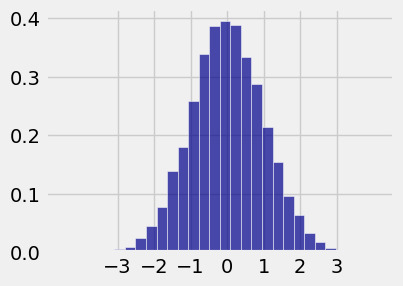

In [55]:
plt.figure(figsize = (4, 3))
plt.hist(z, bins=30, density=True, alpha=0.7, color='darkblue', edgecolor='white')
plt.xticks(np.arange(-3, 3.1, 1));

No surprises there. Now here is the empirical distribution of $1/Z$ based on the same simulated values of $Z$.

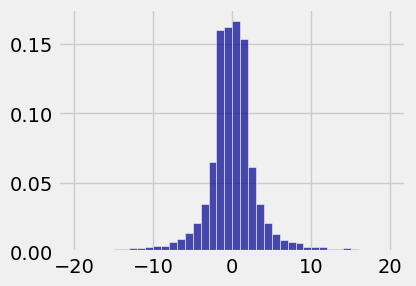

In [56]:
plt.figure(figsize = (4, 3))
plt.hist(1/z, bins=np.arange(-20, 21), density=True, alpha=0.7, color='darkblue', edgecolor='white');

In [57]:
min(1/z), max(1/z), np.std(1/z)

(-24337.62021973558, 11323.006200823002, 239.6347538629086)

That's definitely not normal. Zooming in shows what's happening near $0$.

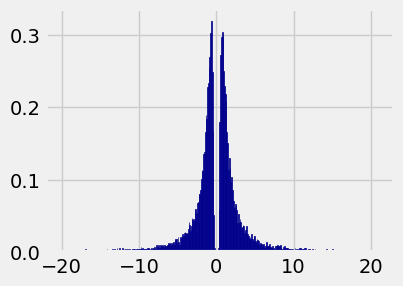

In [58]:
plt.figure(figsize = (4, 3))
plt.hist(1/z, bins=np.arange(-20, 21, 0.1), density=True, color='darkblue', edgecolor='darkblue');

So then why is $1/\bar{X}$ roughly normal when $\bar{X}$ is the roughly normal mean of a large exponential sample? For that matter, in Lecture 1 why were some other non-linear functions of $\bar{X}$ also roughly normal?

## The Delta Method: Intuition
The reason is the *delta method*, introduced in Lecture 1.  The method applies to non-linear function of a normal variable that has a very small SD, that is, a skinny normal.

Let's start with a recap of the intuition from Lecture 1. Let $g$ be a smooth non-linear function and let $Y$ be an approximately normal random variable with a small SD. In our example, $g(\theta) = 1/\theta$ and $Y = \bar{X}_n$. We have assumed that $n$ is large, so $SD(Y)$ is small.

We are interested in the distribution of $g(Y)$. Start with a familiar fact:

- A linear function of a normal variable is normal.

It's easy to believe an initial approximation:

- A linear function of an approximately normal variable is approximately normal.

If $g$ were linear, we'd be done. But $g$ isn't linear. So we need one more step.

The crucial observation is that $Y$ isn't just any normal – it's a skinny normal. Its SD is small, so almost all the probability is concentrated in a small interval three or four SDs on either side of the mean. To understand the distribution of $g(Y)$, we have to examine the behavior of $g$ on this small interval. The rest of the real line won't matter much.

We have assumed $g$ is smooth. Taylor's theorem tells us that to a first approximation, $g$ is approximately linear over any small interval. This gives us a normal approximation to the distribution of $g(Y)$, because:

- An approximately linear function of an approximately normal variable is approximately normal.

In summary, if $g$ is a smooth function and $Y$ is an approximately normal variable with a small SD, then $g(Y)$ is also approximately normal. 

## Establishing the Delta Method
We will now work more formally. The goal is to apply the convergence facts we've learned in this lecture to establish the delta method. 

Our starting point is a formal statement of the result.

**Delta Method:** Let $Y_1, Y_2, \ldots$ be a random sequence. Let $\theta$ and $\sigma > 0$ be constants for which $\sqrt{n}(Y_n - \theta) \stackrel{d}{\rightarrow} N(0, \sigma^2)$. 

Let $g$ be a continuously differentiable function such that $g'(\theta) \ne 0$. Then 
$$
\sqrt{n}(g(Y_n) - g(\theta)) ~ \stackrel{d}{\rightarrow} ~ N(0, (g'(\theta))^2\sigma^2)
$$

**Proof:** Taylor's theorem gives us an identity of random variables:
$$
g(Y_n) ~ = ~ g(\theta) + (Y_n - \theta)g'(\tilde{\theta}_n)
$$
for some $\tilde{\theta}_n$ between $Y_n$ and $\theta$. Keep in mind that $\tilde{\theta}_n$ depends on $Y_n$ and hence is a random variable.

We know that $Y_n \stackrel{P}{\rightarrow} \theta$, and $\vert \tilde{\theta}_n - \theta \vert < \vert Y_n - \theta|$. This implies $\tilde{\theta}_n \stackrel{P}{\rightarrow} \theta$. 

By the continuous mapping theorem, $g'(\tilde{\theta}_n) \stackrel{P}{\rightarrow} g'(\theta)$.

Rearrange the identity $g(Y_n) ~ = ~ g(\theta) + (Y_n - \theta)g'(\tilde{\theta}_n)$ to get

$$
\sqrt{n}(g(Y_n) - g(\theta)) = g'(\tilde{\theta}_n) \cdot \sqrt{n}(Y_n - \theta)
$$

By Slutsky's theorem, the right hand side converges in distribution to $g'(\theta)$ times a normal $(0, \sigma^2)$ variable. That's normal with mean $0$ and variance $(g'(\theta))^2\sigma^2)$.